In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [30]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [32]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [34]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [36]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [38]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [41]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

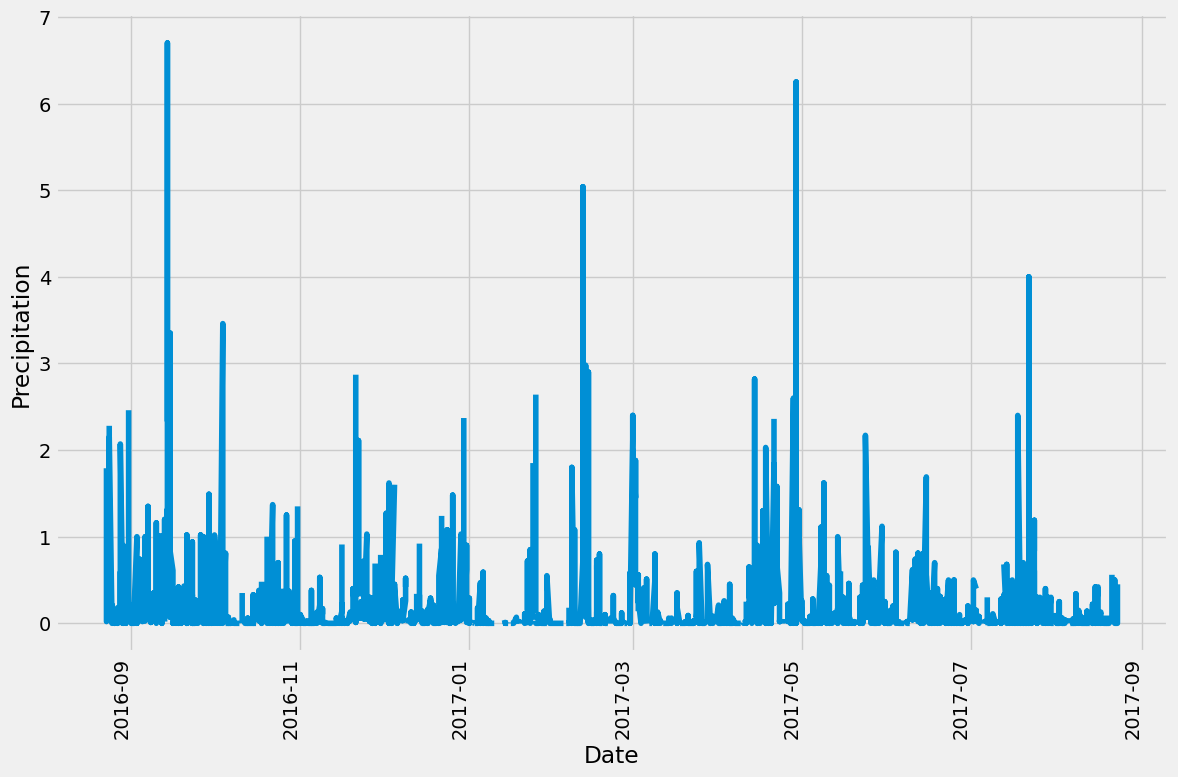

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date_point = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
one_year_date = recent_date_point - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data_precipitation_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_date).all()

# Close the session
session.close()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_scores_df = pd.DataFrame(data_precipitation_scores, columns=["date", "precipitation"])

# Convert the date column to datetime
precipitation_scores_df['date'] = pd.to_datetime(precipitation_scores_df['date'])

# Sort the dataframe by date
precipitation_scores_df = precipitation_scores_df.sort_values(by=["date"], ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_scores_df.plot(x='date', y='precipitation', figsize=(12, 8), rot=90, legend=False)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_precipitation_scores_df = precipitation_scores_df.drop(columns = "date")
summary_precipitation_scores_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [51]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(Station)
stations.count()

9

In [69]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [79]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

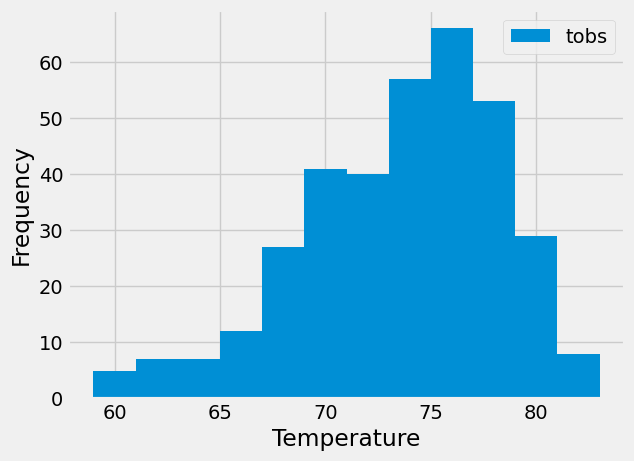

In [121]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == "USC00519281").\
     filter(Measurement.date >= one_year_date).all()
last_12_months_df = pd.DataFrame(last_12_months)
last_12_months_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.show()

# Close Session

In [123]:
# Close Session
session.close()